<a href="https://colab.research.google.com/github/hsantos1985/R-Jobs/blob/main/PROJETO_FINAL_ANALISE_DESCRITIVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### CURSO DE ESTATÍSTICA - PARTE 1
Trabalho de Análise Descritiva de um Conjunto de Dados
Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE.

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

### DATASET DO PROJETO

Pesquisa Nacional por Amostra de Domicílios - 2015
A Pesquisa Nacional por Amostra de Domicílios - PNAD investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

Fonte dos Dados
https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

Variáveis utilizadas
Renda
Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

Idade
Idade do morador na data de referência em anos.

Altura (elaboração própria)


### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

In [5]:
#instalação das bibliotecas

install.packages('ggplot2')
install.packages('ggplot')
install.packages('tapply')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘ggplot’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘tapply’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [8]:
#importação das bibliotecas
library(ggplot2)
#library(ggplot)



#library(tapply)


In [9]:
## 1 IMPORTAÇÃO DOS DADOS

dados<-read.csv('/content/dados.csv', sep=',')
dados

UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
11,0,23,8,12,800,1.603808
11,1,23,2,12,1150,1.739790
11,1,35,8,15,880,1.760444
11,0,46,2,6,3500,1.783158
11,1,47,8,9,150,1.690631
11,1,34,8,12,790,1.637906
11,0,57,8,12,3150,1.570078
11,1,60,8,12,1700,1.608495
11,1,50,4,14,1800,1.780329


In [10]:
head(dados)

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1,11,0,23,8,12,800,1.603808
2,11,1,23,2,12,1150,1.739790
3,11,1,35,8,15,880,1.760444
4,11,0,46,2,6,3500,1.783158
5,11,1,47,8,9,150,1.690631
6,11,1,34,8,12,790,1.637906


In [12]:
## 2 DISTRIBUIÇÃO DE FREQUENCIAS DA VARIÁVEL RENDA
"
Para avaliar o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
Descreva os pontos mais relevantes que você observa na tabela e no gráfico.
Classes de renda:

A ► Acima de 25 SM

B ► De 15 a 25 SM

C ► De 5 a 15 SM

D ► De 2 a 5 SM

E ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de R$ 788,00.

"

#2.1 DEFINIR O INTERVALO DAS CLASSES EM REAIS


classes<-c(min(dados$Renda),
           2 * 788,
           5 * 788,
           15 * 788,
           25 * 788,
           max(dados$Renda)
)

classes

[1] "\nPara avaliar o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)\nDescreva os pontos mais relevantes que você observa na tabela e no gráfico.\nClasses de renda:\n\nA ► Acima de 25 SM\n\nB ► De 15 a 25 SM\n\nC ► De 5 a 15 SM\n\nD ► De 2 a 5 SM\n\nE ► Até 2 SM\n\nPara construir as classes de renda considere que o salário mínimo na época da pesquisa era de R$ 788,00.\n\n"

[1]      0   1576   3940  11820  19700 200000

In [13]:
# 2.2 Definir os labels das classes# 2º Definir os labels das classes

labels<-c('E','D','C','B','A')


In [14]:
#2.3 DEFININDO A COLUNA DE FREQUENCIAS

frequencia<-table(
  cut(
  x=dados$Renda,
  breaks = classes,
  labels=labels,
  include.lowest=TRUE
  )
)

  frequencia


    E     D     C     B     A 
49755 18602  7241   822   420 

In [15]:

#2.3 DEFININDO A COLUNA DE FREQUENCIAS E PORCENTAGEM
  percentual<-round(prop.table(frequencia)*100,2)
percentual


    E     D     C     B     A 
64.75 24.21  9.42  1.07  0.55 

In [21]:
# 2.4 Construir a coluna de percentuais

dist_freq_tab<-cbind('Frequência'=frequencia, 'Porcentagem %'=percentual)
dist_freq_tab


,Frequência,Porcentagem %
E,49755,64.75
D,18602,24.21
C,7241,9.42
B,822,1.07
A,420,0.55


In [19]:
# 2.5 Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

dist_freq_tab[order(row.names(dist_freq_tab)),
  ]

,Frequência,Porcentagem %
A,420,0.55
B,822,1.07
C,7241,9.42
D,18602,24.21
E,49755,64.75


,Frequência,Porcentagem..
,<dbl>,<dbl>
E,49755,64.75
D,18602,24.21
C,7241,9.42
B,822,1.07
A,420,0.55


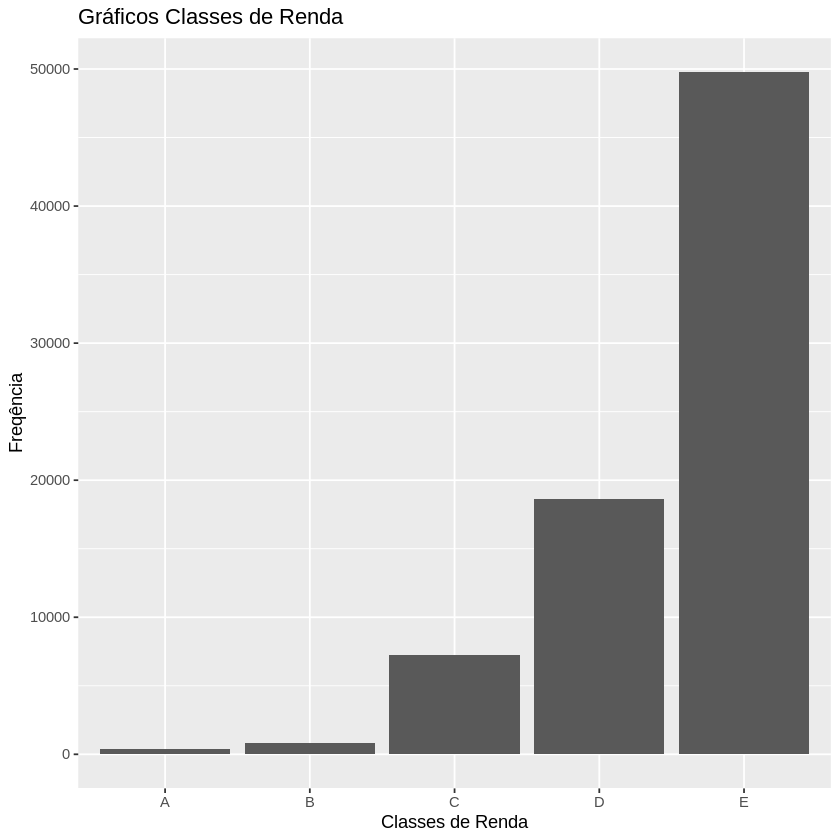

In [23]:
#2.6 Construa um gráfico de barras para visualizar as informações da tabela de frequências acima



bar_chat<-data.frame(dist_freq_tab)
bar_chat



ggplot(
  
  bar_chat,
  aes(x=row.names(bar_chat),
      y=bar_chat$Frequência)) +
    geom_bar(stat='identity')+
    ylab('Freqência')+
    xlab('Classes de Renda')+
    ggtitle('Gráficos Classes de Renda')

In [42]:
# CONCLUSÕES 
"Conclui-se que a clasee A possui a maior renda da população, contudo, apenas 0.55% da população se enquandra nesta classe, a qual posssui renda igual ou superior a 25 sálarios mínimos"

[1] "Conclui-se que a clasee A possui a maior renda da população, contudo, apenas 0.55% da população se enquandra nesta classe, a qual posssui renda igual ou superior a 25 sálarios mínimos"

UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
11,0,23,8,12,800,1.603808
11,1,23,2,12,1150,1.739790
11,1,35,8,15,880,1.760444
11,0,46,2,6,3500,1.783158
11,1,47,8,9,150,1.690631
11,1,34,8,12,790,1.637906
11,0,57,8,12,3150,1.570078
11,1,60,8,12,1700,1.608495
11,1,50,4,14,1800,1.780329


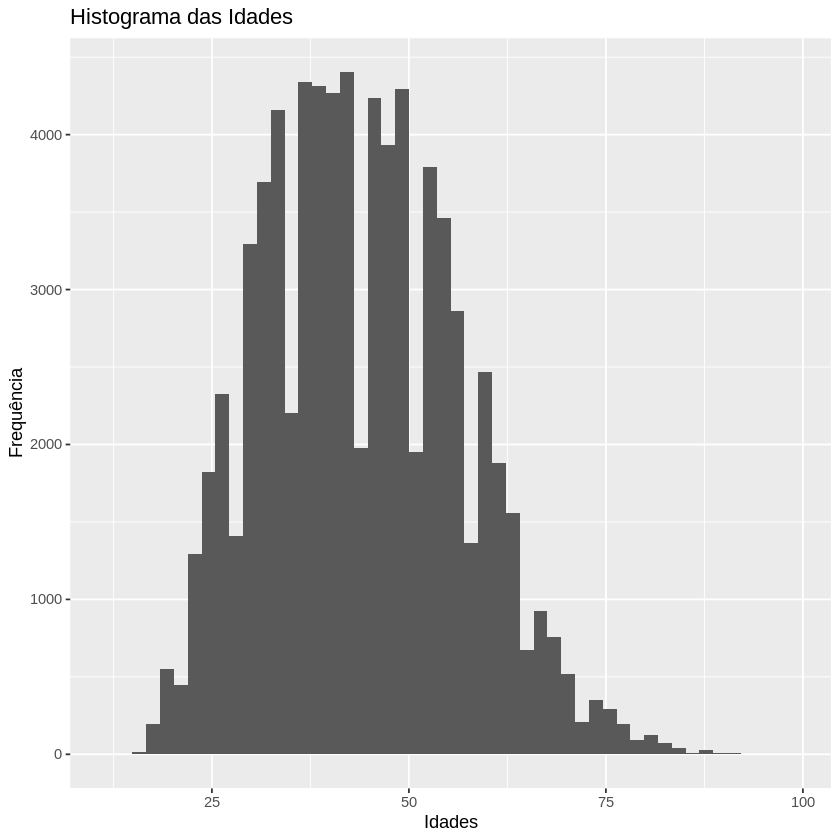

In [25]:
#3 Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset



#3.1 HISTOGRAMAS
#3.11 IDADE

dados


ggplot(dados, aes(x = Idade)) + 
  geom_histogram(bins = 50) + 
  ylab("Frequência") + 
  xlab("Idades") + 
  ggtitle('Histograma das Idades')

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


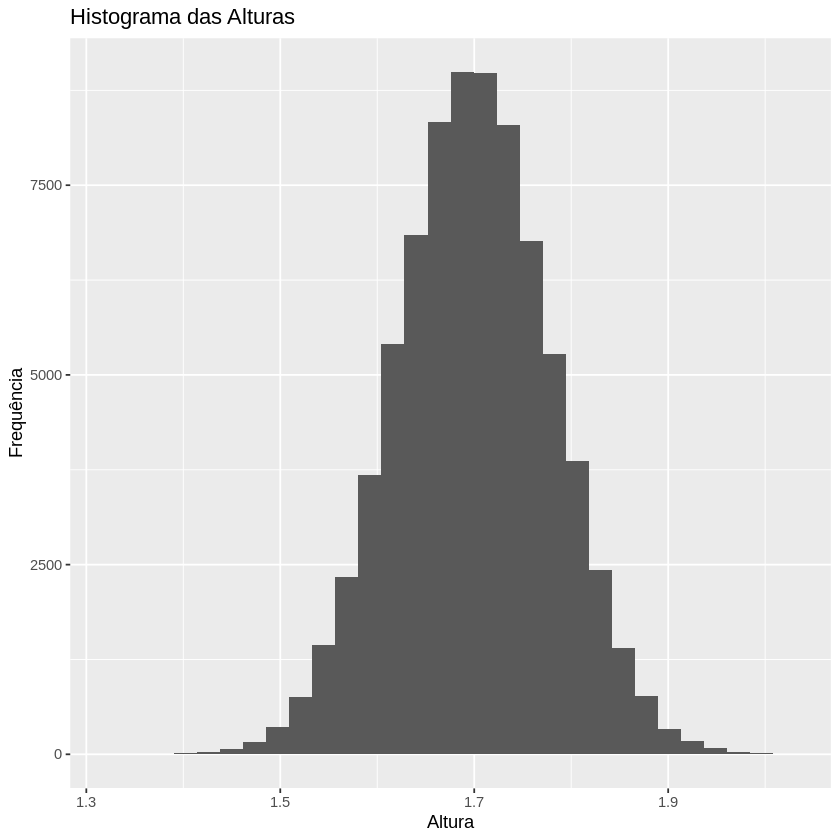

In [27]:
#3.12 ALTURA

ggplot(dados, aes(x = Altura)) + 
  geom_histogram() + 
  ylab("Frequência") + 
  xlab("Altura") + 
  ggtitle('Histograma das Alturas')

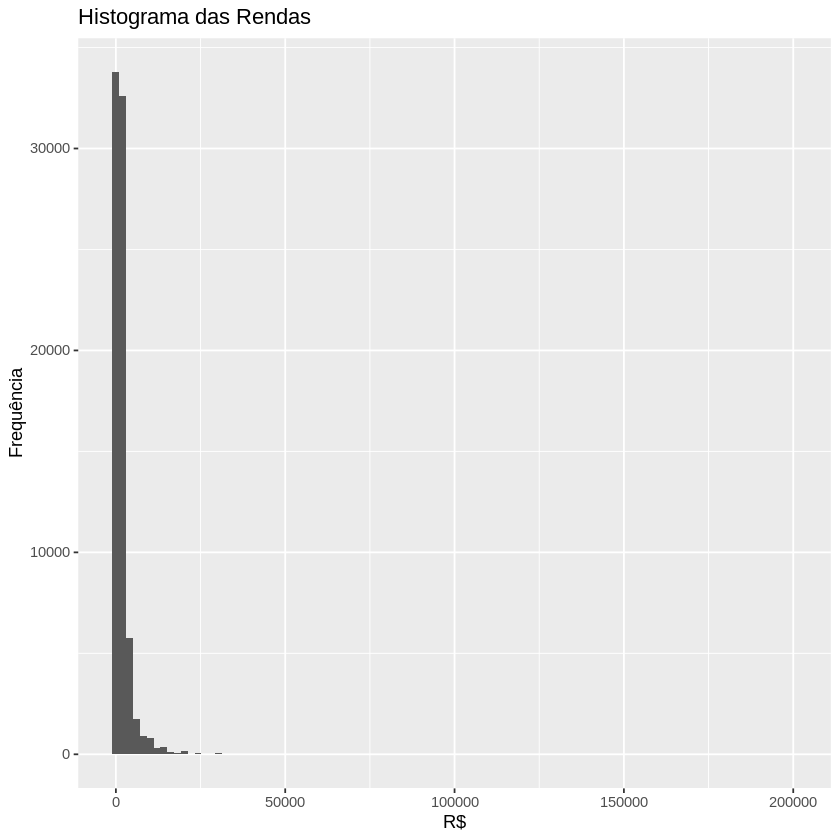

In [29]:

#3.13 RENDA

ggplot(dados, aes(x = Renda)) + 
  geom_histogram(bins = 100) + 
  ylab("Frequência") + 
  xlab("R$") + 
  ggtitle('Histograma das Rendas') 


UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
11,0,23,8,12,800,1.603808
11,1,23,2,12,1150,1.739790
11,1,35,8,15,880,1.760444
11,0,46,2,6,3500,1.783158
11,1,47,8,9,150,1.690631
11,1,34,8,12,790,1.637906
11,0,57,8,12,3150,1.570078
11,1,60,8,12,1700,1.608495
11,1,50,4,14,1800,1.780329


Warning message in plot.window(xlim, ylim, "", ...):
“"breakes" is not a graphical parameter”
Warning message in title(main = main, sub = sub, xlab = xlab, ylab = ylab, ...):
“"breakes" is not a graphical parameter”
Warning message in axis(1, ...):
“"breakes" is not a graphical parameter”
Warning message in axis(2, at = yt, ...):
“"breakes" is not a graphical parameter”


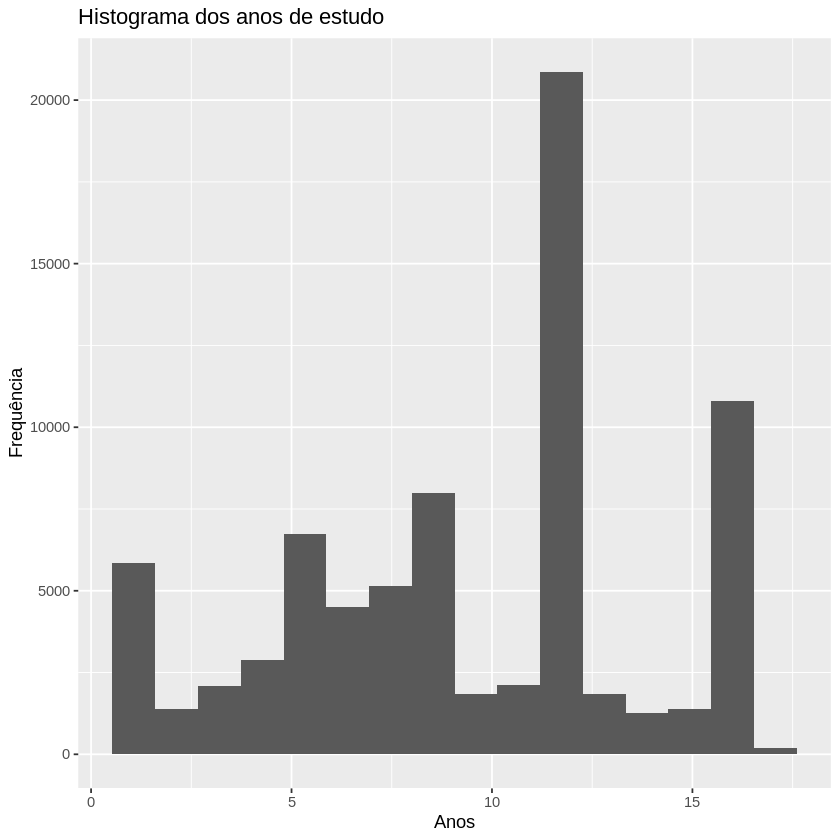

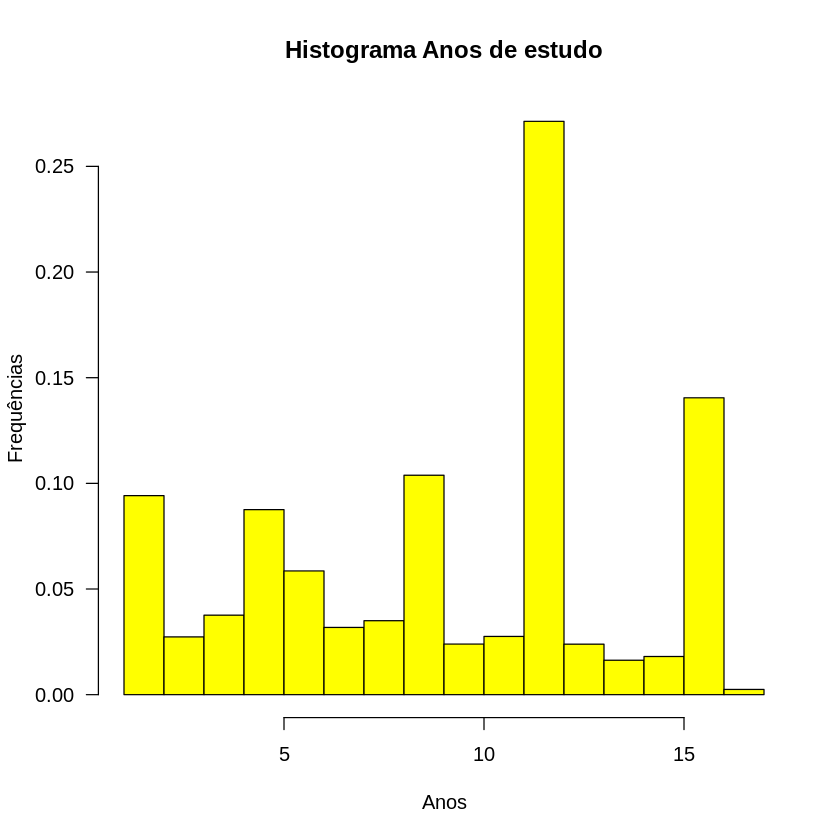

In [31]:
#3.14 ANOS DE ESTUDO


dados

ggplot(dados, aes(x = Anos.de.Estudo)) + 
  geom_histogram(bins = 16) + 
  ylab("Frequência") + 
  xlab("Anos") + 
  ggtitle('Histograma dos anos de estudo') 

# ou ainda 


hist(
  x=dados$Anos.de.Estudo,
  breakes='Sturges',
  col = 'yellow',
  main = 'Histograma Anos de estudo',
  xlab = 'Anos',
  ylab = 'Frequências',
  prob = TRUE,
  las = 1
)


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


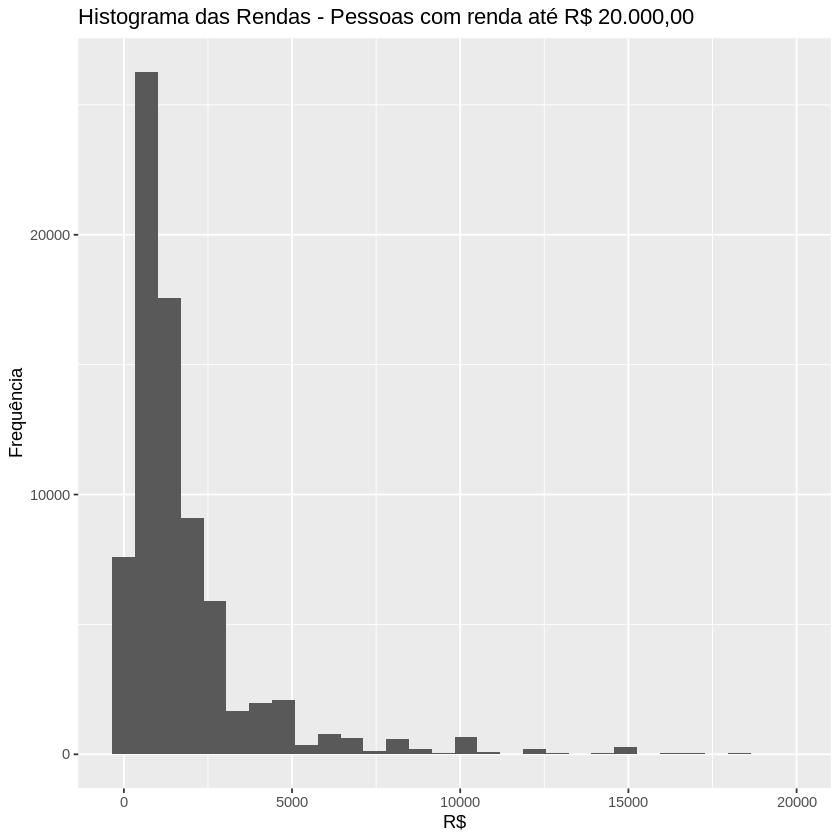

In [32]:
#3.2 RENDIMENTO ATÉ R$20.000, HISTOGRAMA DE RENDA

ggplot(dados[dados$Renda < 20000, ], aes(x = Renda)) + 
  geom_histogram() + 
  ylab("Frequência") + 
  xlab("R$") + 
  ggtitle('Histograma das Rendas - Pessoas com renda até R$ 20.000,00')

In [33]:
# 4 TABELA DE FREQUENCIA SEXO E COR

#Construir uma tabela de frequências e uma com os percentuais cruzando das variáveis SEXO e COR



#Substituindo os valores da coluna sexo

sexo = c(
  'Masculino', 
  'Feminino'
)
cor = c(
  'Indígena', 
  'Branca', 
  'Preta', 
  'Amarela', 
  'Parda'
)
anos_de_estudo = c(
  'Sem instrução e menos de 1 ano', 
  '1 ano', 
  '2 anos', 
  '3 anos', 
  '4 anos', 
  '5 anos', 
  '6 anos', 
  '7 anos', 
  '8 anos', 
  '9 anos', 
  '10 anos', 
  '11 anos', 
  '12 anos', 
  '13 anos', 
  '14 anos', 
  '15 anos ou mais', 
  'Não determinados')

In [34]:
# Sexo
dados$Cat.Sexo<-factor(dados$Sexo)
levels(dados$Cat.Sexo)<-sexo

In [35]:
#Cor
dados$Cat.Cor<-factor(dados$Cor)
levels(dados$Cat.Cor)<-cor

In [36]:
#Anos de Estudo
dados$Cat.Anos.de.Estudo<-factor(dados$Anos.de.Estudo,order=TRUE)
levels(dados$Cat.Anos.de.Estudo)<-anos_de_estudo

head(dados)

,UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo
,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<ord>
1,11,0,23,8,12,800,1.603808,Masculino,Parda,11 anos
2,11,1,23,2,12,1150,1.739790,Feminino,Branca,11 anos
3,11,1,35,8,15,880,1.760444,Feminino,Parda,14 anos
4,11,0,46,2,6,3500,1.783158,Masculino,Branca,5 anos
5,11,1,47,8,9,150,1.690631,Feminino,Parda,8 anos
6,11,1,34,8,12,790,1.637906,Feminino,Parda,11 anos


In [37]:
#Sexo e Anos de estudo
frequencia<-table(dados$Cat.Sexo, dados$Cat.Anos.de.Estudo)
frequencia<-cbind(frequencia)
frequencia

,Sem instrução e menos de 1 ano,1 ano,2 anos,3 anos,4 anos,5 anos,6 anos,7 anos,8 anos,9 anos,10 anos,11 anos,12 anos,13 anos,14 anos,15 anos ou mais,Não determinados
Masculino,4476,1081,1637,2227,5020,3247,1790,1942,5700,1287,1499,13933,1173,827,819,6487,105
Feminino,1373,307,464,664,1709,1252,655,747,2280,553,619,6915,663,426,569,4308,86


In [38]:
#Sexo e Cor
frequencia<-table(dados$Cat.Sexo, dados$Cat.Cor)
frequencia<-cbind(frequencia)
frequencia

percentual<-round(cbind(prop.table(frequencia)*100),2)
percentual



freq<-table(dados$Renda,dados$Sexo )
freq<-cbind(freq)
freq

,Indígena,Branca,Preta,Amarela,Parda
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


,Indígena,Branca,Preta,Amarela,Parda
Masculino,0.33,28.88,7.16,0.31,32.62
Feminino,0.13,12.52,3.76,0.15,14.14


,0,1
0,1830,1037
5,1,0
6,1,0
8,1,1
10,4,5
12,0,1
13,2,1
14,1,0
15,6,2
19,1,0


In [40]:
#CONCLUSÕES
'Percebe-se que 32,6% da população asculina é de cor parda, para o feminino 14,1%'

[1] "Percebe-se que 32,6% da população asculina é de cor parda, para o feminino 14,1%"

In [43]:
#ANÁLISE DESCRITIVA DA RENDA

mean(dados$Renda)


median(dados$Renda)


Moda <- function(x) {
  frequencias <- table(x) 
  return(names(frequencias)[frequencias == max(frequencias)])
}

as.numeric(Moda(dados$Renda))

var(dados$Renda)


sd(dados$Renda)


[1] 2000.383

[1] 1200

[1] 788

[1] 11044906

[1] 3323.388

In [44]:

#Média, mediana,  valor máximo, desvio padrão e variância da variável RENDA segundo cor

medias<-tapply(dados$Renda, list(dados$Cat.Sexo, dados$Cat.Cor), mean)
medias


mediana<-tapply(dados$Renda, list(dados$Cat.Sexo, dados$Cat.Cor), median)
mediana

maximo<-tapply(dados$Renda, list(dados$Cat.Sexo, dados$Cat.Cor), max)
maximo

variancia<-tapply(dados$Renda, list(dados$Cat.Sexo, dados$Cat.Cor), var)
variancia

desvio_padrao<-tapply(dados$Renda, list(dados$Cat.Sexo, dados$Cat.Cor), sd)
desvio_padrao

,Indígena,Branca,Preta,Amarela,Parda
Masculino,1081.711,2925.744,1603.862,4758.251,1659.577
Feminino,2464.386,2109.867,1134.596,3027.342,1176.759


,Indígena,Branca,Preta,Amarela,Parda
Masculino,797.5,1700,1200,2800,1200
Feminino,788.0,1200,800,1500,800


,Indígena,Branca,Preta,Amarela,Parda
Masculino,10000,200000,50000,50000,100000
Feminino,120000,100000,23000,20000,30000


,Indígena,Branca,Preta,Amarela,Parda
Masculino,1449841,22570023,3749294,32957070,5345747
Feminino,142981765,10569087,1821960,13921657,2547960


,Indígena,Branca,Preta,Amarela,Parda
Masculino,1204.093,4750.792,1936.309,5740.825,2312.087
Feminino,11957.498,3251.013,1349.800,3731.174,1596.233


In [45]:
#Conclusões
'Conclui-se que a maior média de renda se encontra para a cor Amarela, tanto para masculino e feminino'

[1] "Conclui-se que a maior média de renda se encontra para a cor Amarela, tanto para masculino e feminino"

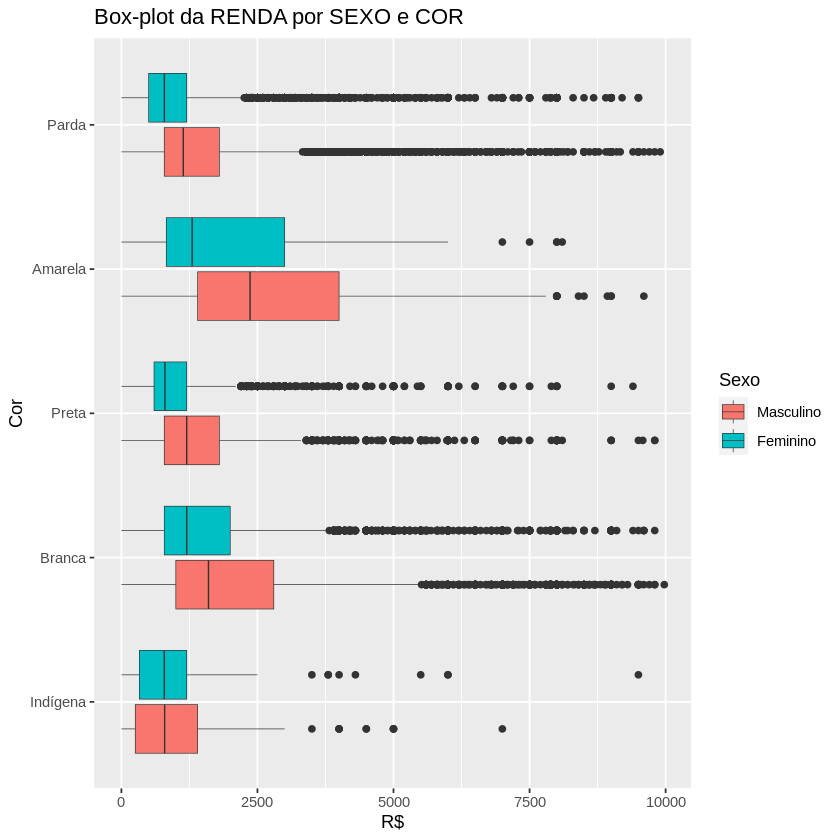

In [46]:
#análise da renda cor e sexo

ggplot(data = dados[dados$Renda < 10000, ], aes(x = Cat.Cor, y = Renda, fill = Cat.Sexo)) + 
  geom_boxplot(size = 0.2) + 
  coord_flip() +
  ylab("R$") + 
  xlab("Cor") + 
  guides(fill = guide_legend(title = 'Sexo')) +
  ggtitle('Box-plot da RENDA por SEXO e COR') 

In [47]:
#Percentual de pessoas do dataset ganham salário mímimo (R$788,00) ou enos?

round(
  
  length(dados$Renda[dados$Renda <= 788]) / length(dados$Renda) ,3
)

[1] 0.289

In [48]:

#o valor máximo ganho por 99% das pessoas de nosso dataset

quantile(dados$Renda, .99)

99% 
15000

In [49]:

#Média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO

dados

medias<-
  tapply(
    dados$Renda, list(
      dados$Cat.Anos.de.Estudo,
      dados$Cat.Sexo),mean    )
    
 medias   

 
 
 medianas<-
   tapply(
     dados$Renda, list(
       dados$Cat.Anos.de.Estudo,
       dados$Cat.Sexo),median )
 
 medianas
 
 
 
 maximos<-
   tapply(
     dados$Renda, list(
       dados$Cat.Anos.de.Estudo,
       dados$Cat.Sexo),max )
 
 maximos
 
 
 desvio_padrao <- tapply(dados$Renda, list(dados$Cat.Anos.de.Estudo, dados$Cat.Sexo), sd)
 desvio_padrao

UF,Sexo,Idade,Cor,Anos.de.Estudo,Renda,Altura,Cat.Sexo,Cat.Cor,Cat.Anos.de.Estudo
<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<fct>,<ord>
11,0,23,8,12,800,1.603808,Masculino,Parda,11 anos
11,1,23,2,12,1150,1.739790,Feminino,Branca,11 anos
11,1,35,8,15,880,1.760444,Feminino,Parda,14 anos
11,0,46,2,6,3500,1.783158,Masculino,Branca,5 anos
11,1,47,8,9,150,1.690631,Feminino,Parda,8 anos
11,1,34,8,12,790,1.637906,Feminino,Parda,11 anos
11,0,57,8,12,3150,1.570078,Masculino,Parda,11 anos
11,1,60,8,12,1700,1.608495,Feminino,Parda,11 anos
11,1,50,4,14,1800,1.780329,Feminino,Preta,13 anos


,Masculino,Feminino
Sem instrução e menos de 1 ano,799.4946,516.2017
1 ano,895.6290,492.7720
2 anos,931.1790,529.9116
3 anos,1109.2039,546.8539
4 anos,1302.3293,704.2791
5 anos,1338.6532,781.3898
6 anos,1448.8754,833.7328
7 anos,1465.4979,830.7510
8 anos,1639.3967,933.6154
9 anos,1508.0389,868.0217


,Masculino,Feminino
Sem instrução e menos de 1 ano,700,390
1 ano,788,400
2 anos,788,450
3 anos,800,500
4 anos,1000,788
5 anos,1045,788
6 anos,1200,788
7 anos,1200,788
8 anos,1300,800
9 anos,1200,788


,Masculino,Feminino
Sem instrução e menos de 1 ano,30000,10000
1 ano,30000,2000
2 anos,40000,4000
3 anos,80000,3500
4 anos,50000,10000
5 anos,35000,8000
6 anos,25000,6000
7 anos,40000,9000
8 anos,30000,18000
9 anos,60000,20000


,Masculino,Feminino
Sem instrução e menos de 1 ano,1023.9049,639.3115
1 ano,1331.9506,425.2918
2 anos,1435.1738,498.2342
3 anos,2143.8001,424.1244
4 anos,1419.8218,629.5534
5 anos,1484.6506,635.7826
6 anos,1476.6286,574.5470
7 anos,1419.7087,602.0380
8 anos,1515.5837,896.7812
9 anos,2137.6648,973.2217


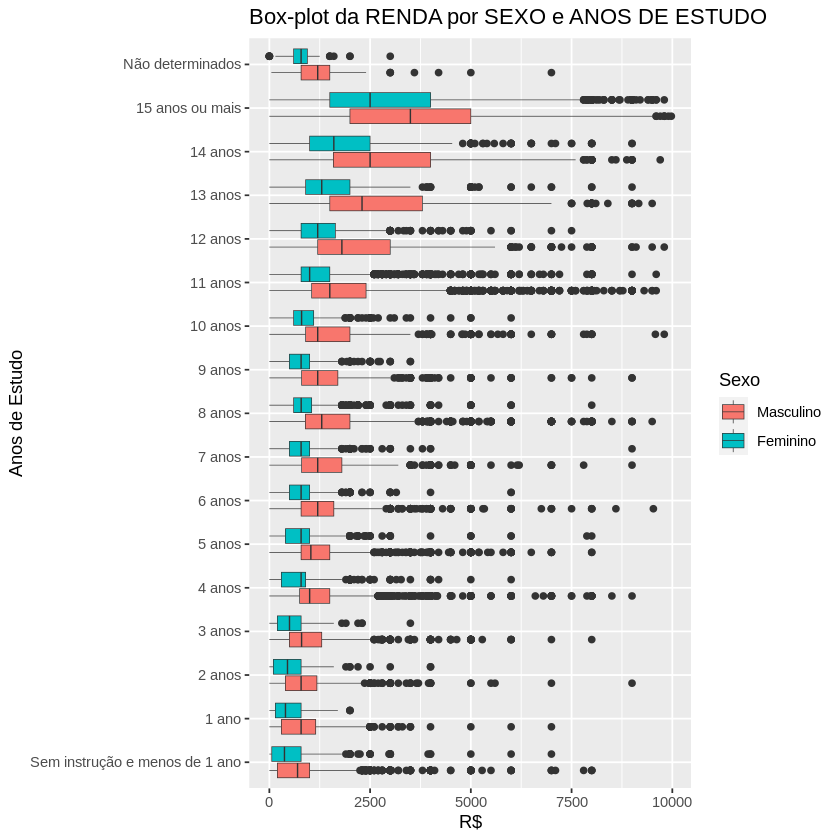

In [51]:
#box plot da renda por sexo e anos de estudo
 
 ggplot(data = dados[dados$Renda < 10000, ], aes(x = Cat.Anos.de.Estudo, y = Renda, fill = Cat.Sexo)) + 
   geom_boxplot(size = 0.2) + 
   coord_flip() +
   ylab("R$") + 
   xlab("Anos de Estudo") + 
   guides(fill = guide_legend(title = 'Sexo')) +
   ggtitle('Box-plot da RENDA por SEXO e ANOS DE ESTUDO') 